In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [1]:
df = pd.read_csv('4222twitterdata_cleaned.csv')
df.shape

NameError: name 'pd' is not defined

In [3]:
df.head()

,personality,date,location,tweet,username,bio,followers,following,favourites,retweets,hashtags,cleaned_text
0,INFP,2021-02-21 10:10:37,Canada,Why is this video SENDING me https://t.co/LPGA...,INFP_Thoughts,Some daily thoughts and opinions of an INFP. 9...,14913,195,0,0,[],Why is this video SENDING me
1,INFP,2021-02-20 06:42:52,Canada,"@YanYears Agreeeeee, buttheycanmakezutaraathin...",INFP_Thoughts,Some daily thoughts and opinions of an INFP. 9...,14913,195,0,0,[],"Agreeeeee, buttheycanmakezutaraathingiftheywan..."
2,INFP,2021-02-20 06:39:21,Canada,@YanYears Some people are speculating that the...,INFP_Thoughts,Some daily thoughts and opinions of an INFP. 9...,14913,195,0,0,[],Some people are speculating that they want to ...
3,INFP,2021-02-20 06:35:48,Canada,Why. https://t.co/afvleXpsSi,INFP_Thoughts,Some daily thoughts and opinions of an INFP. 9...,14913,195,21,2,[],Why.
4,INFP,2021-02-14 03:38:39,Canada,@intp_lola God I love Nasir,INFP_Thoughts,Some daily thoughts and opinions of an INFP. 9...,14913,195,1,0,[],God I love Nasir


In [20]:
df_num = df[['personality', 'followers', 'following', 'favourites', 'retweets']]
df_num

,personality,followers,following,favourites,retweets
0,INFP,14913,195,0,0
1,INFP,14913,195,0,0
2,INFP,14913,195,0,0
3,INFP,14913,195,21,2
4,INFP,14913,195,1,0
...,...,...,...,...,...
78875,ESTJ,1276,1937,0,5
78876,ESTJ,1276,1937,0,32
78877,ESTJ,1276,1937,0,3
78878,ESTJ,1276,1937,0,463


In [21]:
df_num.describe()

,followers,following,favourites,retweets
count,78880.000000,78880.000000,78880.000000,7.888000e+04
mean,5709.281389,1303.450165,12.311346,2.923645e+03
std,27417.359438,6935.166660,392.738776,2.860875e+04
min,6.000000,0.000000,0.000000,0.000000e+00
25%,323.000000,196.000000,0.000000,0.000000e+00
50%,886.000000,485.000000,0.000000,0.000000e+00
75%,2513.000000,1092.000000,2.000000,6.000000e+00
max,623674.000000,191577.000000,76405.000000,2.149369e+06


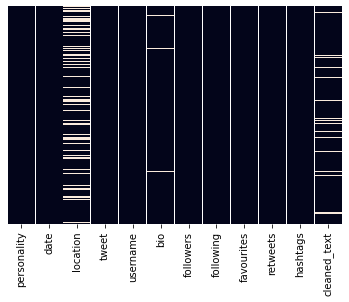

In [6]:
# check for missing values represented by white lines

sns.heatmap(df_num.isnull(),cbar=False,yticklabels=False)

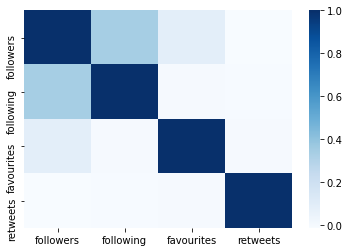

In [30]:
# check for correlation between numerical variables
sns.heatmap(df_num.corr(),cmap='Blues') 

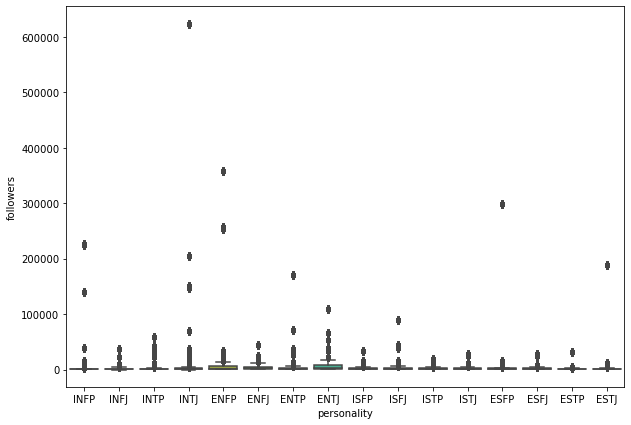

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="followers", data=df_num)

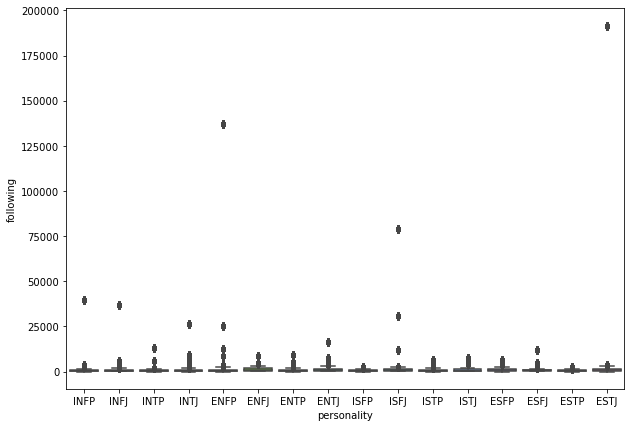

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="following", data=df_num)

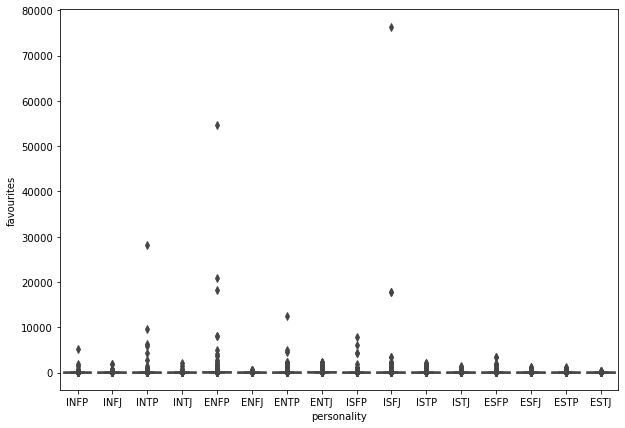

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="favourites", data=df_num)

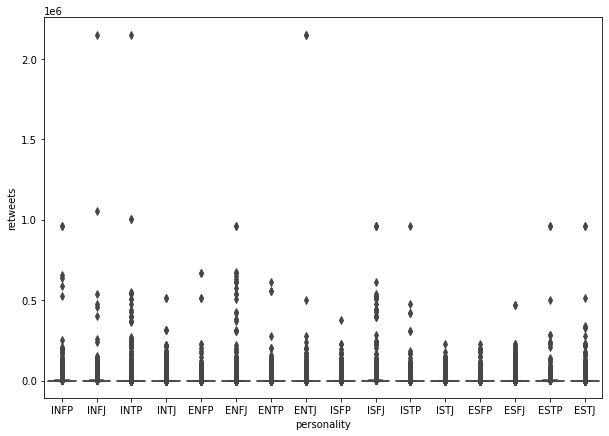

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="retweets", data=df_num)

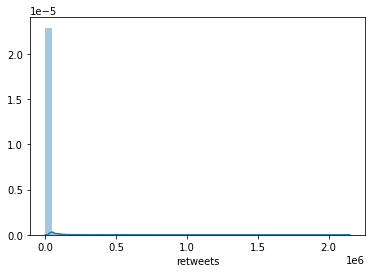

In [31]:
# distribution
sns.distplot(df_num.retweets)

In [32]:
# find outliers 

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

followers     2190.0
following      896.0
favourites       2.0
retweets         6.0
dtype: float64


In [33]:
df_num_outliers = df_num[~((df_num < (Q1 - 1.5 * IQR)) |(df_num> (Q3 + 1.5 * IQR))).any(axis=1)]
df_num_outliers

,personality,followers,following,favourites,retweets
100,INFP,1609,1301,0,0
101,INFP,1609,1301,0,0
102,INFP,1609,1301,0,0
103,INFP,1609,1301,0,0
104,INFP,1609,1301,0,0
...,...,...,...,...,...
78872,ESTJ,1276,1937,0,1
78874,ESTJ,1276,1937,3,1
78875,ESTJ,1276,1937,0,5
78877,ESTJ,1276,1937,0,3


In [34]:
df_num_outliers.describe()

,followers,following,favourites,retweets
count,47071.000000,47071.000000,47071.000000,47071.000000
mean,1030.059272,623.033439,0.844044,0.616664
std,1097.009136,579.722970,1.188359,2.020929
min,6.000000,0.000000,0.000000,0.000000
25%,272.000000,178.000000,0.000000,0.000000
50%,686.000000,405.000000,0.000000,0.000000
75%,1392.000000,917.000000,1.000000,0.000000
max,5777.000000,2436.000000,5.000000,15.000000


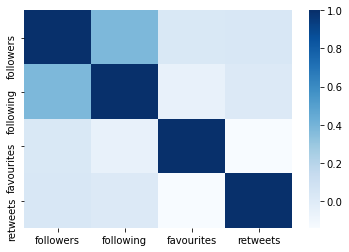

In [36]:
sns.heatmap(df_num_outliers.corr(),cmap='Blues') 

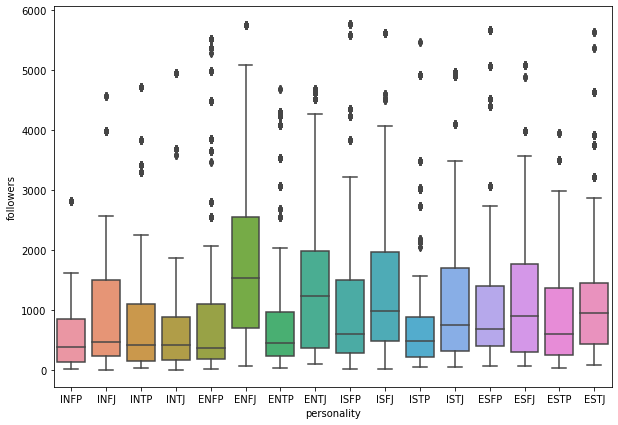

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="followers", data=df_num_outliers)

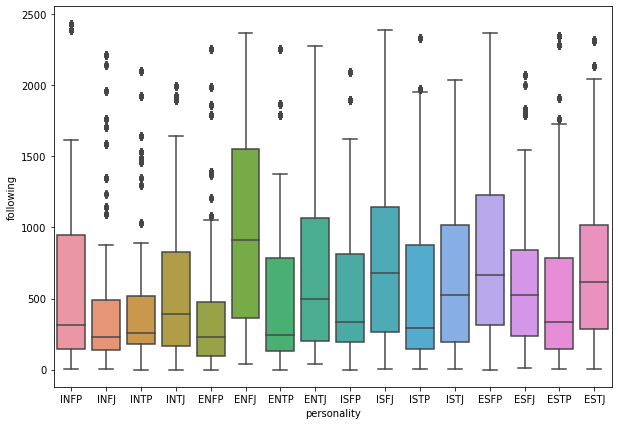

In [39]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="following", data=df_num_outliers)

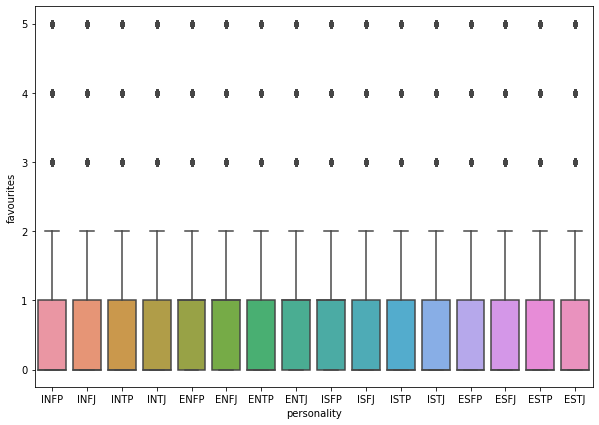

In [42]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="favourites", data=df_num_outliers)

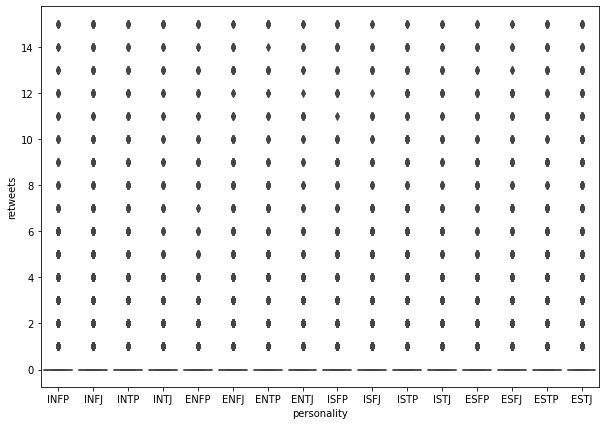

In [40]:
plt.figure(figsize=(10,7))
sns.boxplot(x="personality", y="retweets", data=df_num_outliers)